In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#cargar archivo desde seaborn 
df=pd.read_csv('Bologna_Clean.csv')
#eliminamos la columna unnamed 
df= df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,listing_url,name,description,neighborhood_overview,picture_url,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,https://www.airbnb.com/rooms/42196,50 sm Studio in the historic centre,The studio is a fully restored ancient basemen...,No se proporcionan detalles,https://a0.muscache.com/pictures/4775726/68044...,Carlo,2010-07-29,within an hour,100%,f,...,4.65,4.92,4.88,4.87,4.66,2.0,2.0,0.0,0.0,1.37
1,https://www.airbnb.com/rooms/46352,A room in Pasolini's house,"Simple, cozy and silent room in a lived house ...",In the very nearby you have Via Saragozza and ...,https://a0.muscache.com/pictures/9f94acc3-98fc...,Eleonora,2011-03-28,a few days or more,44%,f,...,4.60,4.83,4.85,4.84,4.67,2.0,0.0,2.0,0.0,2.57
2,https://www.airbnb.com/rooms/85368,Garden House Bologna,No se proporciona descripción,No se proporcionan detalles,https://a0.muscache.com/pictures/585815/331d45...,Anna Maria,2011-03-28,Desconocido,-%,f,...,4.83,4.98,4.98,4.80,4.81,1.0,1.0,0.0,0.0,0.39
3,https://www.airbnb.com/rooms/204553,Private Room & Bath Ex-Convent in Centro Storico,The neighbourhood is the most prestigious of B...,"Safest, most central, quietest street in Bolog...",https://a0.muscache.com/pictures/36151297/8be9...,Elizabeth,2011-05-09,within an hour,100%,f,...,4.92,4.94,4.93,4.97,4.86,1.0,0.0,1.0,0.0,1.68
4,https://www.airbnb.com/rooms/219878,Gorgeous Haven in Centro Storico,"Quiet, bright, fully equipped 800 square feet ...","has many shops, cafes, wine bars, restaurants ...",https://a0.muscache.com/pictures/f16e5b7e-68b3...,Elisa,2011-09-10,within a few hours,100%,t,...,4.95,4.90,4.92,4.84,4.78,2.0,2.0,0.0,0.0,1.09


In [3]:
f1=df.iloc[ :  , [8,9,10,13,14,20,24,25,28,40] ]
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,100%,f,t,Entire rental unit,Entire home/apt,t,2.0,1.0,80.0,4.65
1,44%,f,t,Private room in rental unit,Private room,f,2.0,1.0,43.0,4.60
2,-%,f,t,Entire rental unit,Entire home/apt,f,5.0,1.0,120.0,4.83
3,100%,f,t,Private room in rental unit,Private room,f,2.0,1.0,92.0,4.92
4,100%,t,t,Entire rental unit,Entire home/apt,f,2.0,1.0,147.0,4.95
...,...,...,...,...,...,...,...,...,...,...
4838,100%,f,f,Private room in home,Private room,f,2.0,1.0,70.0,5.00
4839,100%,f,t,Entire rental unit,Entire home/apt,f,5.0,1.0,254.0,5.00
4840,-%,f,f,Entire rental unit,Entire home/apt,t,4.0,1.0,84.0,5.00
4841,100%,f,t,Entire rental unit,Entire home/apt,f,2.0,1.0,100.0,5.00


In [ ]:
#convertimos string a numéricos
f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
f1['host_identity_verified'] = f1['host_identity_verified'].replace({'f': 0, 't': 1})
f1['instant_bookable'] = f1['instant_bookable'].replace({'f': 0, 't': 1})

frecuencias = f1['property_type'].value_counts()
f1['property_type'] = f1['property_type'].map(frecuencias)

f1['host_response_rate'] = f1['host_response_rate'].astype(str).str.rstrip('%')
f1['host_response_rate'] = pd.to_numeric(f1['host_response_rate'], errors='coerce').fillna(0)

f1['room_type'] = f1['room_type'].map({
    'Entire home/apt': 1,
    'Private room': 2,
    'Shared room': 3,
    'Hotel room': 4
})

f1['price'] = f1['price'].astype(str).str.rstrip('$')
f1['price'] = pd.to_numeric(f1['price'], errors='coerce').fillna(0)

C:\Users\pplcf\AppData\Local\Temp\ipykernel_17184\1986825469.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\pplcf\AppData\Local\Temp\ipykernel_17184\1986825469.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1['host_is_superhost'] = f1['host_is_superhost'].replace({'f': 0, 't': 1})
C:\Users\pplcf\AppData\Local\Temp\ipykernel_17184\1986825469.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be remo

In [5]:
f1

,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
1,44.0,0,1,434,2,0,2.0,1.0,43.0,4.60
2,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
3,100.0,0,1,434,2,0,2.0,1.0,92.0,4.92
4,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
...,...,...,...,...,...,...,...,...,...,...
4838,100.0,0,0,42,2,0,2.0,1.0,70.0,5.00
4839,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [6]:
#f2 = Entire home/apt
f2= f1[(f1["room_type"] == 1)]


In [7]:
f2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3756 entries, 0 to 4842
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   host_response_rate         3756 non-null   float64
 1   host_is_superhost          3756 non-null   int64  
 2   host_identity_verified     3756 non-null   int64  
 3   property_type              3756 non-null   int64  
 4   room_type                  3756 non-null   int64  
 5   instant_bookable           3756 non-null   int64  
 6   accommodates               3756 non-null   float64
 7   bathrooms                  3756 non-null   float64
 8   price                      3756 non-null   float64
 9   review_scores_cleanliness  3756 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 322.8 KB


<Axes: xlabel='room_type', ylabel='price'>

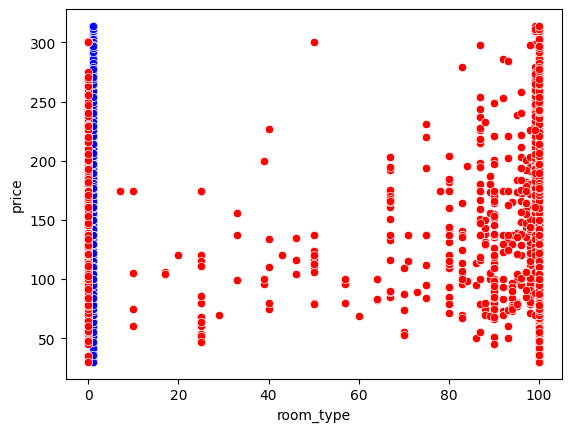

In [8]:
#imprimimos el scatter plot entre la variable dependiente total e independiente (a)
#para observar el comportamiento en su dispersión 

from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

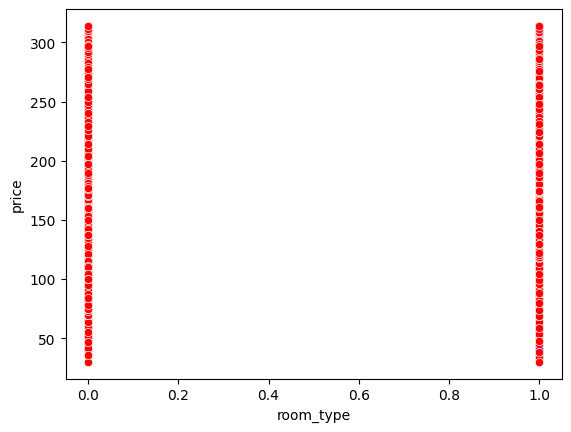

In [9]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

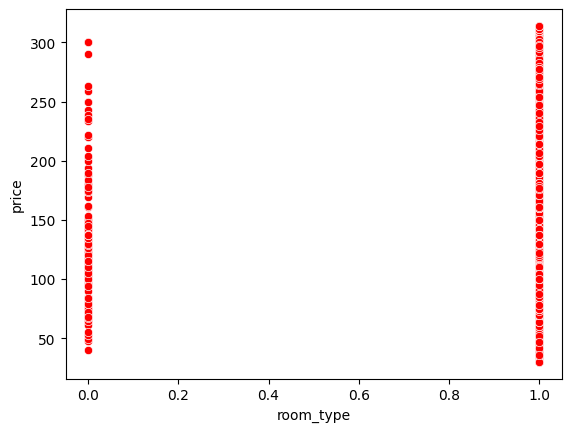

In [10]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

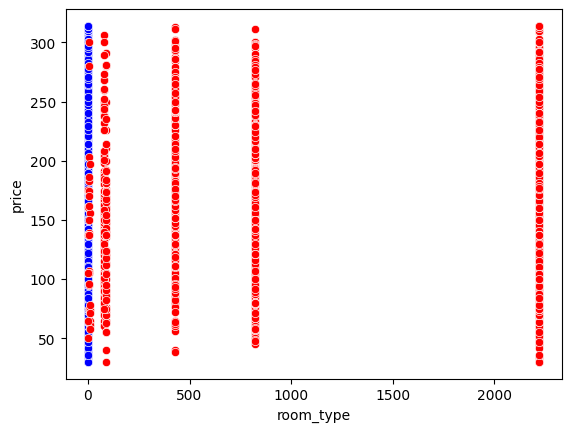

In [11]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

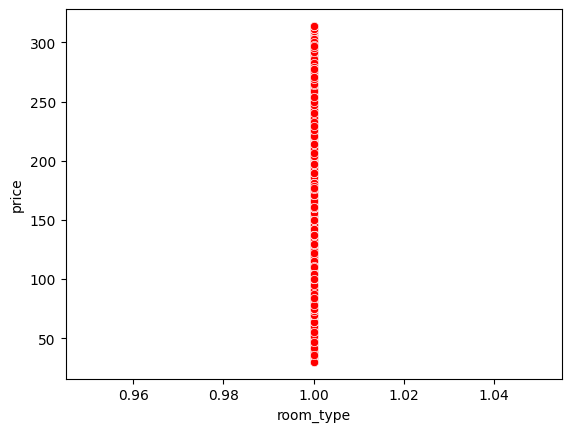

In [12]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

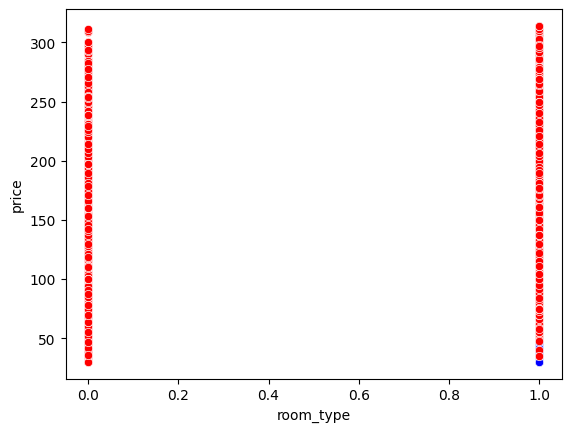

In [13]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

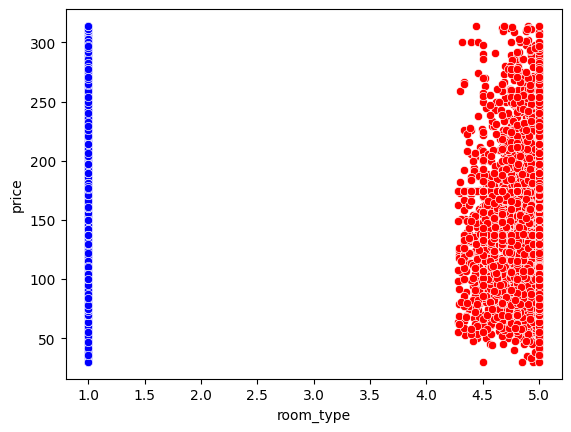

In [14]:
from turtle import color 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='price', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='accommodates'>

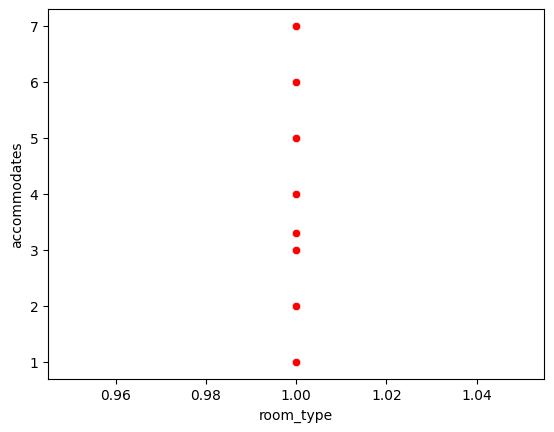

In [15]:
from turtle import color 

sns.scatterplot(x='room_type', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='accommodates', color='red', data=f2)

**DECLARACIÓN DE VARIABLES INDEPENDIENTES Y DEPENDIENTES**

In [16]:
#declaración de las variables independientes que se van a comparar con el precio 
Var_Indep= f2[['host_response_rate']]
Var_Indep2=f2[['host_is_superhost']]
Var_Indep3=f2[['room_type']]
Var_Indep4=f2[['host_identity_verified']]
Var_Indep5= f2[['property_type']]
Var_Indep6= f2[['instant_bookable']]
Var_Indep7= f2[['review_scores_cleanliness']]
#declaración de variable independiente para accommodates 
Var_Indep8= f2[['bathrooms']]

In [17]:
#variables independientes para la regresión lineal
Var_Dep= f2['price']
Var_Dep2= f2['accommodates']

**DEFINICIÓN DEL MODELO**

In [18]:
#se define model como función de regresión lineal 
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model2=LinearRegression()
model3=LinearRegression()
model4=LinearRegression()
model5=LinearRegression()
model6=LinearRegression()
model7=LinearRegression()
model8=LinearRegression()

In [19]:
#verficamos la función relacionada al modelo 
type(model)
type(model2)
type(model3)
type(model4)
type(model5)
type(model6)
type(model7)
type(model8)

sklearn.linear_model._base.LinearRegression

In [20]:
#ajustamos el modelo con las variables antes declaradas
model.fit(X=Var_Indep, y=Var_Dep)
model2.fit(X=Var_Indep2, y=Var_Dep)
model3.fit(X=Var_Indep3, y=Var_Dep)
model4.fit(X=Var_Indep4, y=Var_Dep)
model5.fit(X=Var_Indep5, y=Var_Dep)
model6.fit(X=Var_Indep6, y=Var_Dep)
model7.fit(X=Var_Indep7, y=Var_Dep)
model8.fit(X=Var_Indep8, y=Var_Dep2)

LinearRegression()

**COEFICIENTES OBTENIDOS PARA NUESTROS MODELOS**

In [21]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_response_rate'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.03005287]),
 'rank_': 1,
 'singular_': array([1909.96202583]),
 'intercept_': np.float64(148.22833538674544)}

In [22]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model2.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_is_superhost'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([5.68562638]),
 'rank_': 1,
 'singular_': array([30.03592099]),
 'intercept_': np.float64(143.31888888888895)}

In [23]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model3.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['room_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(145.59858892438766)}

In [24]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model4.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['host_identity_verified'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([10.26214456]),
 'rank_': 1,
 'singular_': array([12.03866464]),
 'intercept_': np.float64(135.7490066225166)}

In [25]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model5.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['property_type'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([-0.00619633]),
 'rank_': 1,
 'singular_': array([50936.14678723]),
 'intercept_': np.float64(155.19677882490592)}

In [26]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model6.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['instant_bookable'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([17.54596102]),
 'rank_': 1,
 'singular_': array([30.48587724]),
 'intercept_': np.float64(135.93803317535543)}

In [27]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model7.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['review_scores_cleanliness'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([26.82200459]),
 'rank_': 1,
 'singular_': array([10.57478996]),
 'intercept_': np.float64(15.808508328792414)}

In [28]:
#verificamos los coeficientes obtenidos para el modelo ajustado 
model8.__dict__

{'fit_intercept': True,
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['bathrooms'], dtype=object),
 'n_features_in_': 1,
 'coef_': array([0.]),
 'rank_': 0,
 'singular_': array([0.]),
 'intercept_': np.float64(3.610090521831736)}

**A PARTIR DE AQUÍ PREDECIMOS VALORES DE ACUERDO AL MODELO MATEMÁTICO**

**Modelo matemático y=-0.94114872x + 1327.7330443080114**

In [29]:
#predecimos valores
y_pred= model.predict(X=f2[['host_response_rate']])
y_pred

array([145.22304802, 148.22833539, 145.22304802, ..., 148.22833539,
       145.22304802, 148.22833539], shape=(3756,))

**Modelo matemático y=21.00986237x + 1237.7516553524084**

In [30]:
#predecimos valores
y_pred2= model2.predict(X=f2[['host_is_superhost']])
y_pred2

array([143.31888889, 143.31888889, 149.00451527, ..., 143.31888889,
       143.31888889, 143.31888889], shape=(3756,))

**Modelo matemático y=0x + 11247.1754189944133**

In [31]:
#predecimos valores
y_pred3= model3.predict(X=f2[['room_type']])
y_pred3

array([145.59858892, 145.59858892, 145.59858892, ..., 145.59858892,
       145.59858892, 145.59858892], shape=(3756,))

**Modelo matemático y=-112.80942578x + 1357.171593533486**

In [32]:
#predecimos valores
y_pred4= model4.predict(X=f2[['host_identity_verified']])
y_pred4

array([146.01115118, 146.01115118, 146.01115118, ..., 135.74900662,
       146.01115118, 146.01115118], shape=(3756,))

**Modelo matemático y=-4.56100445x + 1325.0492572068565**

In [33]:
#predecimos valores
y_pred5= model5.predict(X=f2[['property_type']])
y_pred5

array([141.42852576, 141.42852576, 141.42852576, ..., 141.42852576,
       141.42852576, 141.42852576], shape=(3756,))

**Modelo matemático y=71.48464608x + 1217.0755372065255**

In [34]:
#predecimos valores
y_pred6= model6.predict(X=f2[['instant_bookable']])
y_pred6

array([153.4839942 , 135.93803318, 135.93803318, ..., 153.4839942 ,
       135.93803318, 153.4839942 ], shape=(3756,))

**Modelo matemático y=381.28956491x + -604.4218714343112**

In [35]:
y_pred7= model7.predict(X=f2[['review_scores_cleanliness']])
y_pred7

array([140.53082967, 145.35879049, 148.57743104, ..., 149.91853127,
       149.91853127, 149.91853127], shape=(3756,))

**Modelo matemático y=0.97488088x + 2.1063441944025767**

In [36]:
y_pred8= model8.predict(X=f2[['bathrooms']])
y_pred8

array([3.61009052, 3.61009052, 3.61009052, ..., 3.61009052, 3.61009052,
       3.61009052], shape=(3756,))

**INSERTAMOS LA COLUMNA DE PREDICCIONES A NUESTRO DATAFRAME**

In [37]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(0, 'Prediccion_host_response_rate', y_pred)
f2

,Prediccion_host_response_rate,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [38]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(1, 'Prediccion_host_is_superhost', y_pred2)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,143.318889,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,143.318889,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,149.004515,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,149.004515,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,143.318889,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,143.318889,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,143.318889,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,143.318889,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,143.318889,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [39]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(2, 'Prediccion_room_type', y_pred3)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,143.318889,145.598589,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,143.318889,145.598589,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,149.004515,145.598589,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,149.004515,145.598589,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,143.318889,145.598589,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,143.318889,145.598589,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,143.318889,145.598589,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,143.318889,145.598589,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,143.318889,145.598589,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [40]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(3, 'Prediccion_host_identity_verified', y_pred4)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,143.318889,145.598589,146.011151,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,143.318889,145.598589,146.011151,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,149.004515,145.598589,146.011151,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,149.004515,145.598589,146.011151,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,143.318889,145.598589,146.011151,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,143.318889,145.598589,146.011151,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,143.318889,145.598589,146.011151,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,143.318889,145.598589,135.749007,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,143.318889,145.598589,146.011151,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [41]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(4, 'Prediccion_property_type', y_pred5)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,143.318889,145.598589,146.011151,141.428526,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,143.318889,145.598589,146.011151,141.428526,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,149.004515,145.598589,146.011151,141.428526,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,149.004515,145.598589,146.011151,141.428526,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,143.318889,145.598589,146.011151,141.428526,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,143.318889,145.598589,146.011151,141.428526,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,143.318889,145.598589,146.011151,141.428526,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,143.318889,145.598589,135.749007,141.428526,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,143.318889,145.598589,146.011151,141.428526,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [42]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(5, 'Prediccion_instant_bookable', y_pred6)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,143.318889,145.598589,146.011151,141.428526,153.483994,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,143.318889,145.598589,146.011151,141.428526,135.938033,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,149.004515,145.598589,146.011151,141.428526,135.938033,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,149.004515,145.598589,146.011151,141.428526,153.483994,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,143.318889,145.598589,146.011151,141.428526,135.938033,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,143.318889,145.598589,135.749007,141.428526,153.483994,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [43]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(6, 'Prediccion_review_scores_cleanliness', y_pred7)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,143.318889,145.598589,146.011151,141.428526,153.483994,140.530830,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,143.318889,145.598589,146.011151,141.428526,135.938033,145.358790,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,149.004515,145.598589,146.011151,141.428526,135.938033,148.577431,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,149.004515,145.598589,146.011151,141.428526,153.483994,147.504551,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,143.318889,145.598589,146.011151,141.428526,135.938033,143.481250,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,149.918531,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,149.918531,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,143.318889,145.598589,135.749007,141.428526,153.483994,149.918531,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,149.918531,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


In [44]:
#insertamos la columna de predicciones en el DataFrame 
f2.insert(7, 'Prediccion_bathrooms', y_pred8)
f2

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_room_type,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,room_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
0,145.223048,143.318889,145.598589,146.011151,141.428526,153.483994,140.530830,3.610091,100.0,0,1,2222,1,1,2.0,1.0,80.0,4.65
2,148.228335,143.318889,145.598589,146.011151,141.428526,135.938033,145.358790,3.610091,0.0,0,1,2222,1,0,5.0,1.0,120.0,4.83
4,145.223048,149.004515,145.598589,146.011151,141.428526,135.938033,148.577431,3.610091,100.0,1,1,2222,1,0,2.0,1.0,147.0,4.95
5,145.223048,149.004515,145.598589,146.011151,141.428526,153.483994,147.504551,3.610091,100.0,1,1,2222,1,1,4.0,1.0,214.0,4.91
7,148.228335,143.318889,145.598589,146.011151,141.428526,135.938033,143.481250,3.610091,0.0,0,1,2222,1,0,4.0,1.0,85.0,4.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4837,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,149.918531,3.610091,100.0,0,1,2222,1,0,2.0,1.0,78.0,5.00
4839,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,149.918531,3.610091,100.0,0,1,2222,1,0,5.0,1.0,254.0,5.00
4840,148.228335,143.318889,145.598589,135.749007,141.428526,153.483994,149.918531,3.610091,0.0,0,0,2222,1,1,4.0,1.0,84.0,5.00
4841,145.223048,143.318889,145.598589,146.011151,141.428526,135.938033,149.918531,3.610091,100.0,0,1,2222,1,0,2.0,1.0,100.0,5.00


**GRÁFICAS COMPARATIVAS**

<Axes: xlabel='host_response_rate', ylabel='price'>

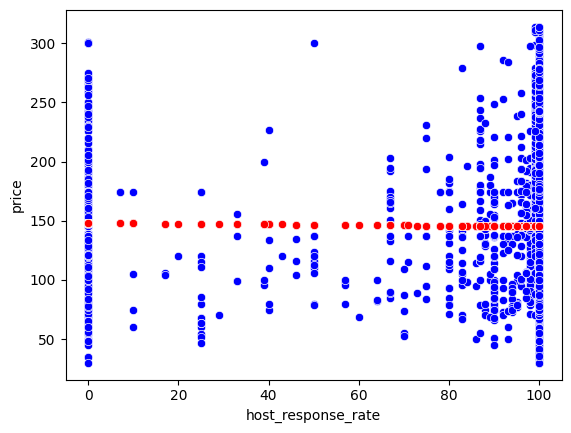

In [45]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_response_rate', y='price', color='blue', data=f2)
sns.scatterplot(x='host_response_rate', y='Prediccion_host_response_rate', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_is_superhost', ylabel='price'>

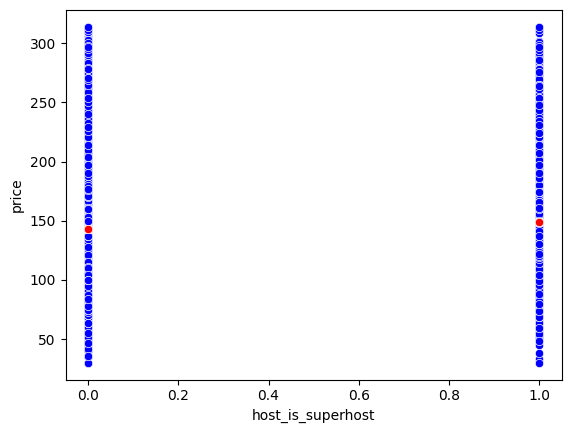

In [46]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_is_superhost', y='price', color='blue', data=f2)
sns.scatterplot(x='host_is_superhost', y='Prediccion_host_is_superhost', color='red', data=f2)
#sns.lineplot(x='host_is_superhost', y='Predicciones2', color='red', data=f2)

<Axes: xlabel='room_type', ylabel='price'>

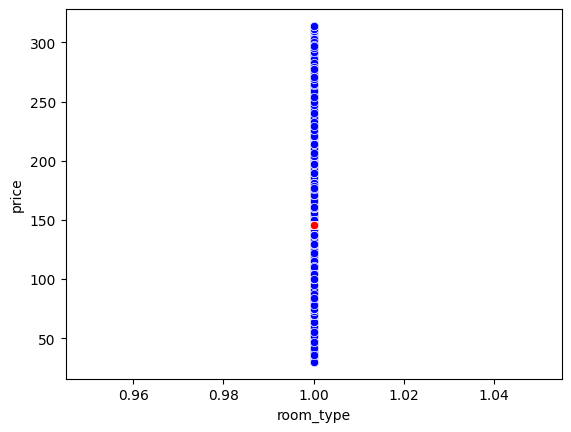

In [47]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='room_type', y='price', color='blue', data=f2)
sns.scatterplot(x='room_type', y='Prediccion_room_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='host_identity_verified', ylabel='price'>

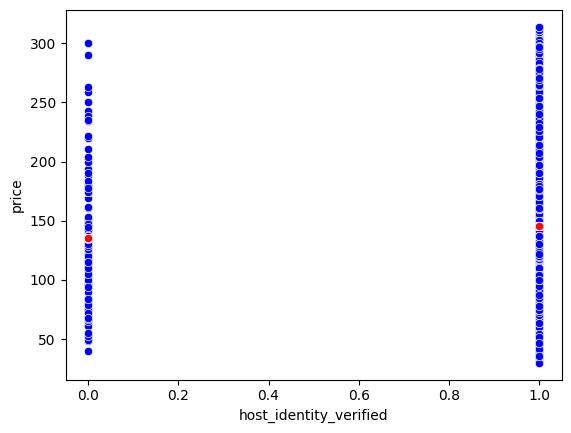

In [48]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='host_identity_verified', y='price', color='blue', data=f2)
sns.scatterplot(x='host_identity_verified', y='Prediccion_host_identity_verified', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='property_type', ylabel='price'>

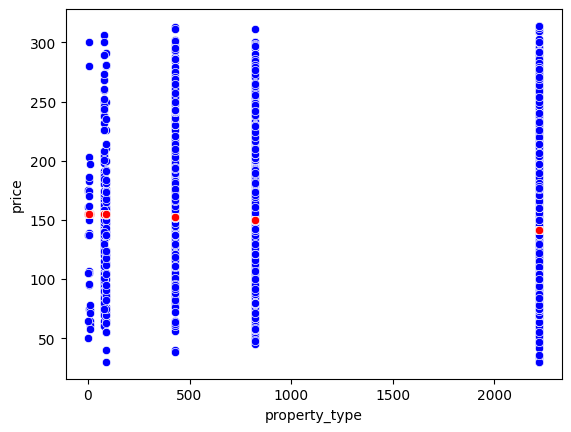

In [49]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='property_type', y='price', color='blue', data=f2)
sns.scatterplot(x='property_type', y='Prediccion_property_type', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: xlabel='instant_bookable', ylabel='price'>

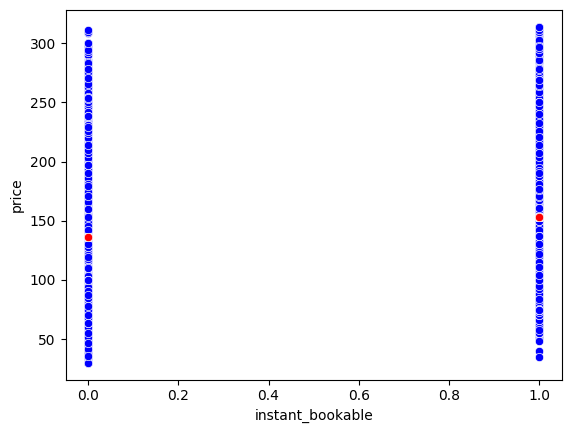

In [50]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

sns.scatterplot(x='instant_bookable', y='price', color='blue', data=f2)
sns.scatterplot(x='instant_bookable', y='Prediccion_instant_bookable', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Precio en relación a calificación de limpieza predecido'}, xlabel='review_scores_cleanliness', ylabel='price'>

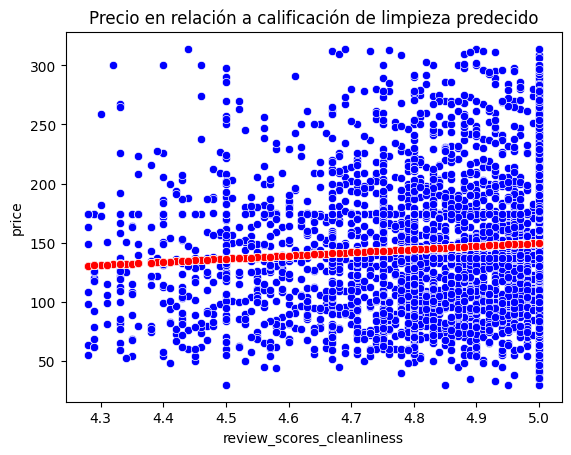

In [51]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 

plt.title("Precio en relación a calificación de limpieza predecido")
sns.scatterplot(x='review_scores_cleanliness', y='price', color='blue', data=f2)
sns.scatterplot(x='review_scores_cleanliness', y='Prediccion_review_scores_cleanliness', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

<Axes: title={'center': 'Capacidad en relación a cantidad de baños predecido'}, xlabel='bathrooms', ylabel='accommodates'>

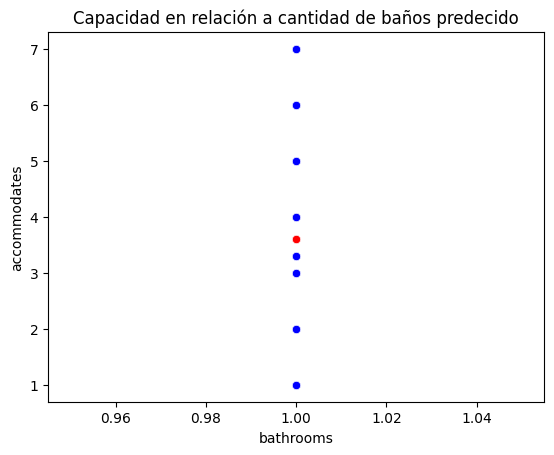

In [52]:
#Visualizamos la gráfica comparativa entre el total real y el total predecido 
plt.title("Capacidad en relación a cantidad de baños predecido")
sns.scatterplot(x='bathrooms', y='accommodates', color='blue', data=f2)
sns.scatterplot(x='bathrooms', y='Prediccion_bathrooms', color='red', data=f2)
#sns.lineplot(x='host_response_rate', y='Predicciones1', color='red', data=f2)

**COEFICIENTES DE DETERMINACIÓN**

In [53]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter= model.score(X=Var_Indep, y=Var_Dep)
coef_Deter

0.00028239669586305194

In [54]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter2= model2.score(X=Var_Indep2, y=Var_Dep)
coef_Deter2

0.0024996354609361227

In [55]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter3= model3.score(X=Var_Indep3, y=Var_Dep)
coef_Deter3

0.0

In [56]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter4= model4.score(X=Var_Indep4, y=Var_Dep)
coef_Deter4

0.0013081905996079612

In [57]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter5= model5.score(X=Var_Indep5, y=Var_Dep)
coef_Deter5

0.008538073375342847

In [58]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter6= model6.score(X=Var_Indep6, y=Var_Dep)
coef_Deter6

0.024523917638461845

In [59]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter7= model7.score(X=Var_Indep7, y=Var_Dep)
coef_Deter7

0.006895473600347146

In [60]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter8= model8.score(X=Var_Indep8, y=Var_Dep2)
coef_Deter8

0.0

**COEFICIENTES DE CORRELACIÓN**

In [61]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl=np.sqrt(coef_Deter)
coef_Correl

np.float64(0.016804662920244844)

In [62]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl2=np.sqrt(coef_Deter2)
coef_Correl2

np.float64(0.049996354476462807)

In [63]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl3=np.sqrt(coef_Deter2)
coef_Correl3

np.float64(0.049996354476462807)

In [64]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl4=np.sqrt(coef_Deter4)
coef_Correl4

np.float64(0.03616891758966476)

In [65]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl5=np.sqrt(coef_Deter5)
coef_Correl5

np.float64(0.09240169573845952)

In [66]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl6=np.sqrt(coef_Deter6)
coef_Correl6

np.float64(0.1566011418810918)

In [67]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl7=np.sqrt(coef_Deter7)
coef_Correl7

np.float64(0.08303898843523533)

In [68]:
#Corroboramos cual es el coeficiente de Correlación de nuestro modelo
coef_Correl8=np.sqrt(coef_Deter8)
coef_Correl8

np.float64(0.0)

In [69]:
#eliminamos room_type y su prediccion 

f2= f2.drop(['room_type', 'Prediccion_room_type' ], axis=1)

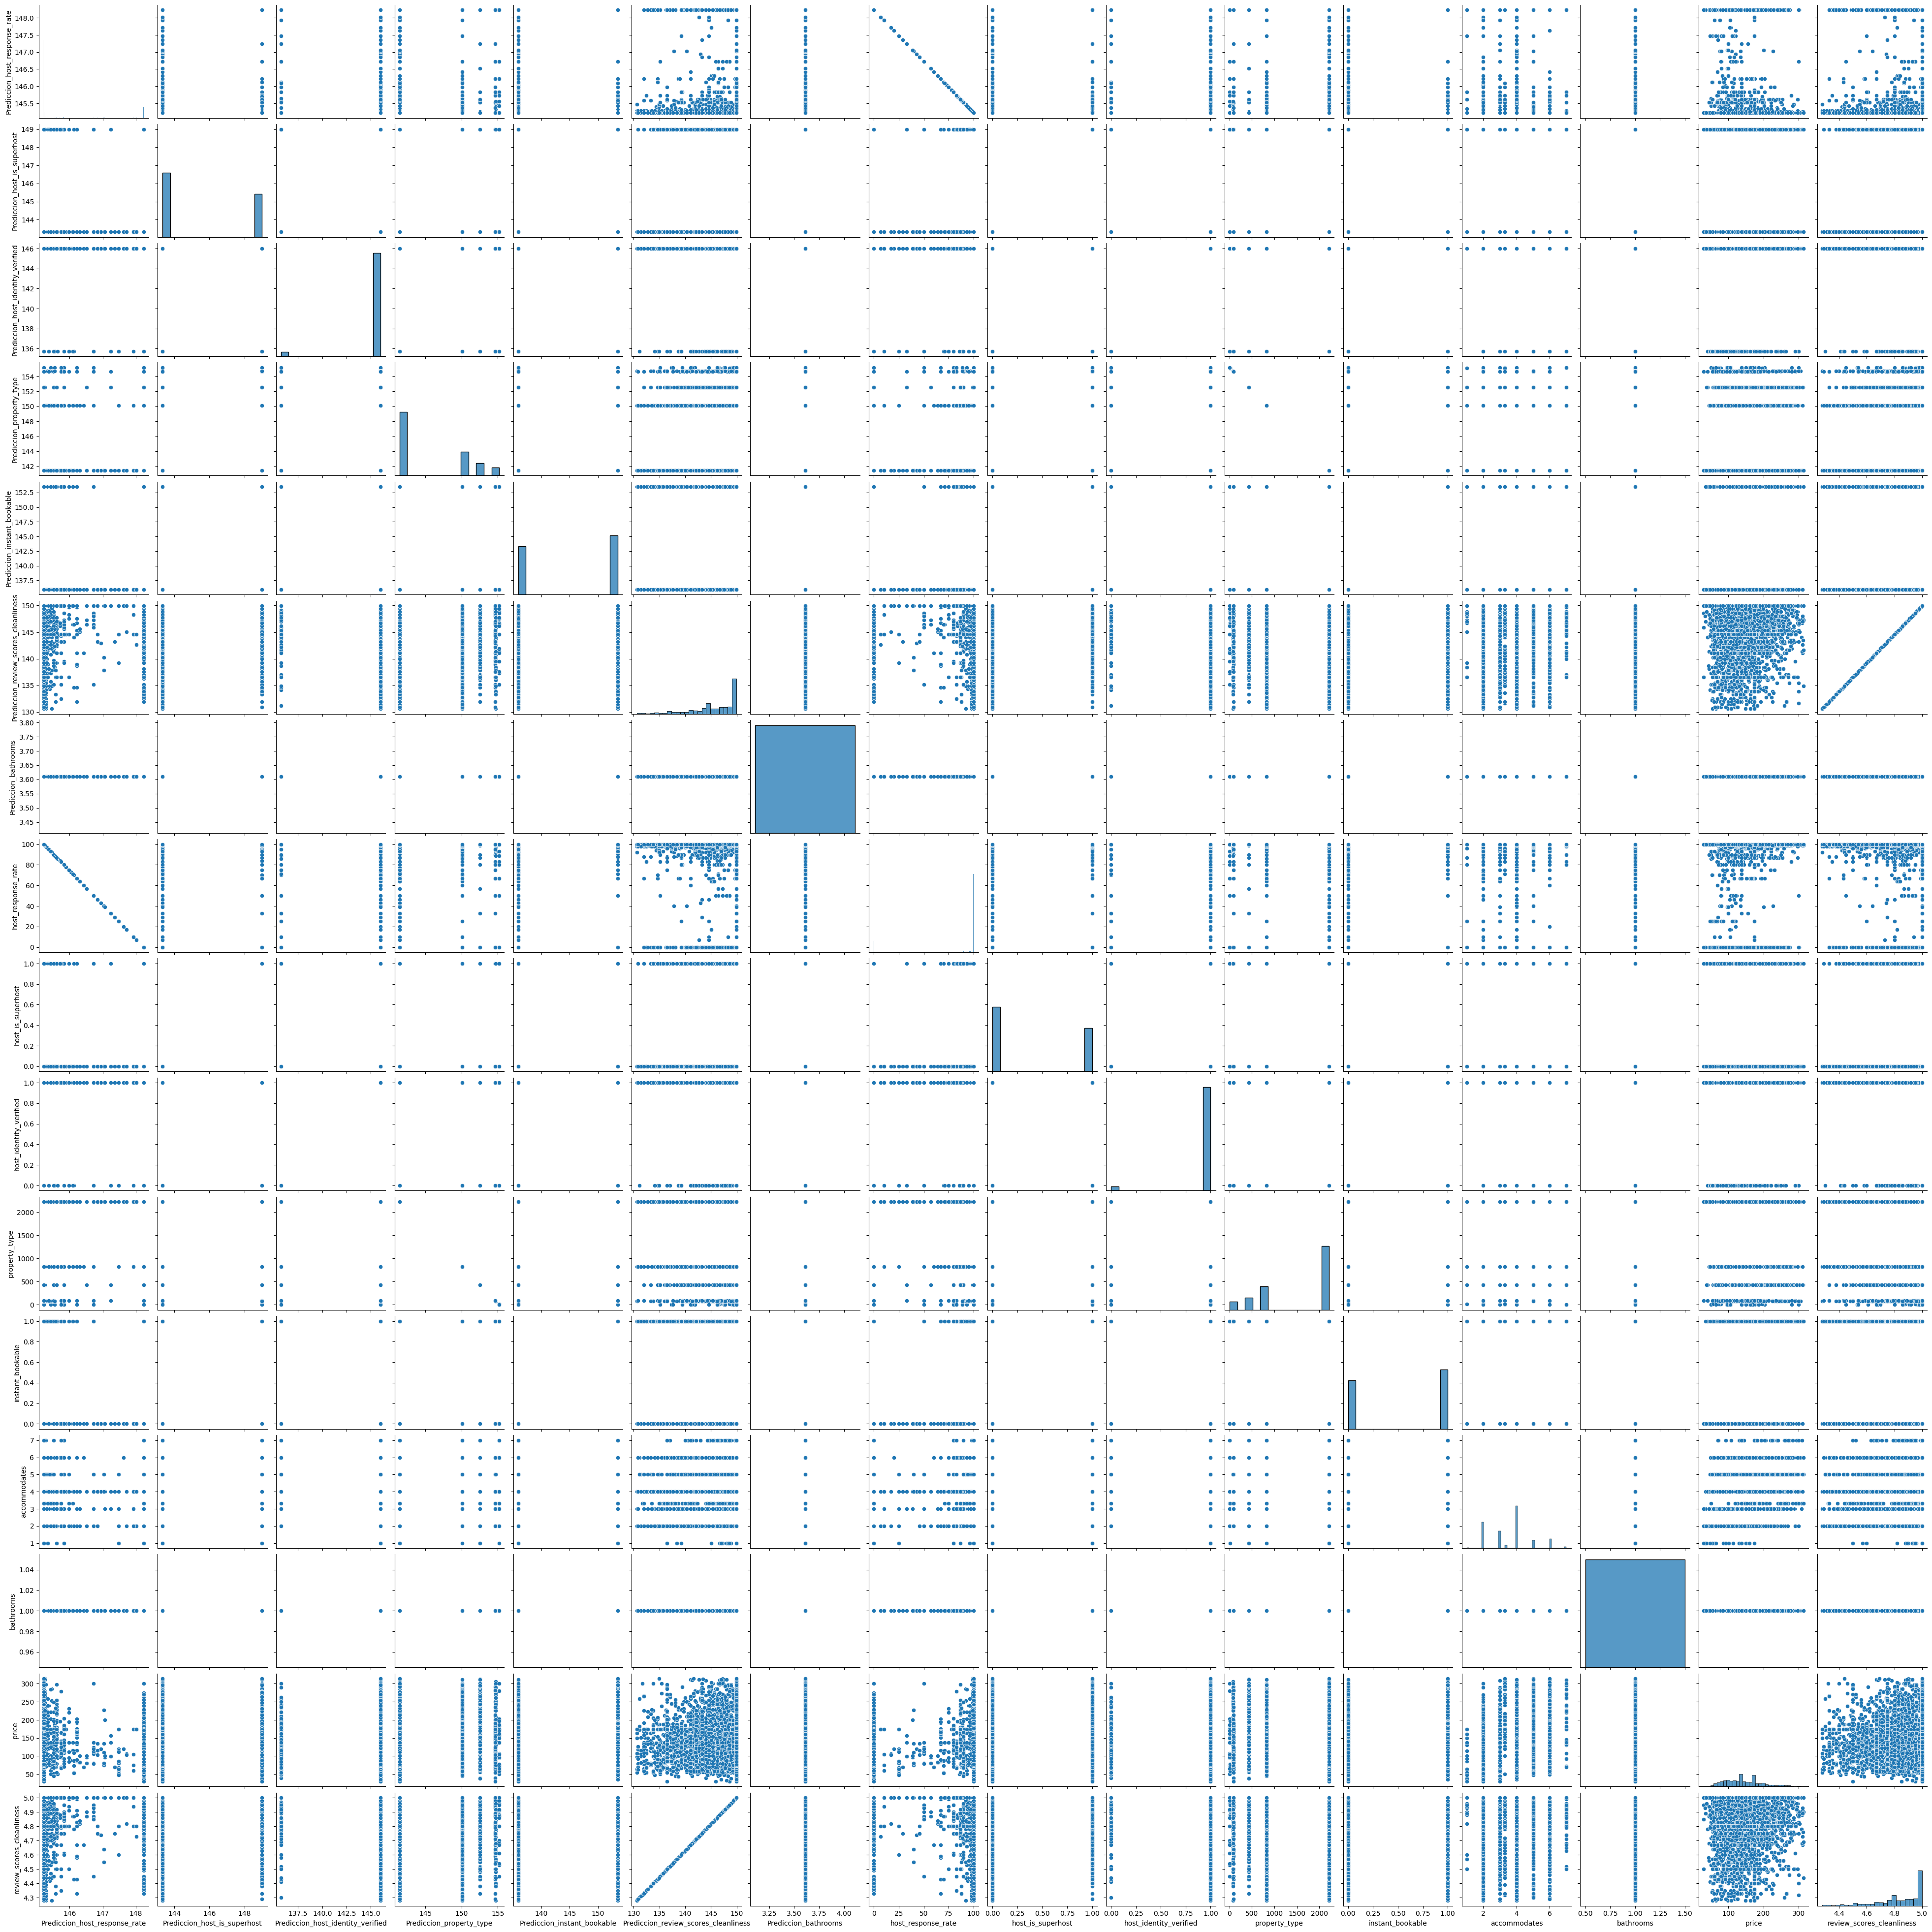

In [70]:
#Graficamos todas las dispersiones entre todas las variables
sns.pairplot(f2)

In [71]:
#Analizar categorias de una columna
df6 = f2.groupby(['host_response_rate'])['host_response_rate'].count()
df6

host_response_rate
0.0       391
7.0         2
10.0        4
17.0        2
20.0        1
25.0       15
29.0        1
33.0        4
39.0        3
40.0        5
43.0        1
46.0        3
50.0       11
57.0        4
60.0        1
64.0        3
67.0       18
70.0        5
71.0        2
73.0        1
75.0       11
78.0        2
80.0       23
83.0       14
84.0        3
86.0        3
87.0       35
88.0       11
89.0        8
90.0       46
92.0       12
93.0       13
94.0       14
95.0       14
96.0       38
97.0       28
98.0       80
99.0      199
100.0    2725
Name: host_response_rate, dtype: int64

In [72]:
#Encontramos todas las correlaciones entre las variables 
Corr_Factors= f2.corr()
Corr_Factors

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,-0.233477,-0.172271,0.011450,-0.134384,0.102552,NaN,-1.000000,-0.233477,-0.172271,-0.011450,-0.134384,-0.068845,NaN,0.016805,0.102552
Prediccion_host_is_superhost,-0.233477,1.000000,0.134253,0.154405,-0.028593,0.211432,NaN,0.233477,1.000000,0.134253,-0.154405,-0.028593,0.001738,NaN,0.049996,0.211432
Prediccion_host_identity_verified,-0.172271,0.134253,1.000000,0.018034,0.090293,-0.091826,NaN,0.172271,0.134253,1.000000,-0.018034,0.090293,0.037706,NaN,0.036169,-0.091826
Prediccion_property_type,0.011450,0.154405,0.018034,1.000000,0.024584,0.089173,NaN,-0.011450,0.154405,0.018034,-1.000000,0.024584,0.003666,NaN,0.092402,0.089173
Prediccion_instant_bookable,-0.134384,-0.028593,0.090293,0.024584,1.000000,-0.142870,NaN,0.134384,-0.028593,0.090293,-0.024584,1.000000,0.139788,NaN,0.156601,-0.142870
Prediccion_review_scores_cleanliness,0.102552,0.211432,-0.091826,0.089173,-0.142870,1.000000,NaN,-0.102552,0.211432,-0.091826,-0.089173,-0.142870,-0.016845,NaN,0.083039,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,-1.000000,0.233477,0.172271,-0.011450,0.134384,-0.102552,NaN,1.000000,0.233477,0.172271,0.011450,0.134384,0.068845,NaN,-0.016805,-0.102552
host_is_superhost,-0.233477,1.000000,0.134253,0.154405,-0.028593,0.211432,NaN,0.233477,1.000000,0.134253,-0.154405,-0.028593,0.001738,NaN,0.049996,0.211432
host_identity_verified,-0.172271,0.134253,1.000000,0.018034,0.090293,-0.091826,NaN,0.172271,0.134253,1.000000,-0.018034,0.090293,0.037706,NaN,0.036169,-0.091826


In [73]:
#Encontramos el valor absoluto de todas las correlaciones entre las variables 
Corr_Factors1= abs(Corr_Factors)
Corr_Factors1

,Prediccion_host_response_rate,Prediccion_host_is_superhost,Prediccion_host_identity_verified,Prediccion_property_type,Prediccion_instant_bookable,Prediccion_review_scores_cleanliness,Prediccion_bathrooms,host_response_rate,host_is_superhost,host_identity_verified,property_type,instant_bookable,accommodates,bathrooms,price,review_scores_cleanliness
Prediccion_host_response_rate,1.000000,0.233477,0.172271,0.011450,0.134384,0.102552,NaN,1.000000,0.233477,0.172271,0.011450,0.134384,0.068845,NaN,0.016805,0.102552
Prediccion_host_is_superhost,0.233477,1.000000,0.134253,0.154405,0.028593,0.211432,NaN,0.233477,1.000000,0.134253,0.154405,0.028593,0.001738,NaN,0.049996,0.211432
Prediccion_host_identity_verified,0.172271,0.134253,1.000000,0.018034,0.090293,0.091826,NaN,0.172271,0.134253,1.000000,0.018034,0.090293,0.037706,NaN,0.036169,0.091826
Prediccion_property_type,0.011450,0.154405,0.018034,1.000000,0.024584,0.089173,NaN,0.011450,0.154405,0.018034,1.000000,0.024584,0.003666,NaN,0.092402,0.089173
Prediccion_instant_bookable,0.134384,0.028593,0.090293,0.024584,1.000000,0.142870,NaN,0.134384,0.028593,0.090293,0.024584,1.000000,0.139788,NaN,0.156601,0.142870
Prediccion_review_scores_cleanliness,0.102552,0.211432,0.091826,0.089173,0.142870,1.000000,NaN,0.102552,0.211432,0.091826,0.089173,0.142870,0.016845,NaN,0.083039,1.000000
Prediccion_bathrooms,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
host_response_rate,1.000000,0.233477,0.172271,0.011450,0.134384,0.102552,NaN,1.000000,0.233477,0.172271,0.011450,0.134384,0.068845,NaN,0.016805,0.102552
host_is_superhost,0.233477,1.000000,0.134253,0.154405,0.028593,0.211432,NaN,0.233477,1.000000,0.134253,0.154405,0.028593,0.001738,NaN,0.049996,0.211432
host_identity_verified,0.172271,0.134253,1.000000,0.018034,0.090293,0.091826,NaN,0.172271,0.134253,1.000000,0.018034,0.090293,0.037706,NaN,0.036169,0.091826


<Axes: >

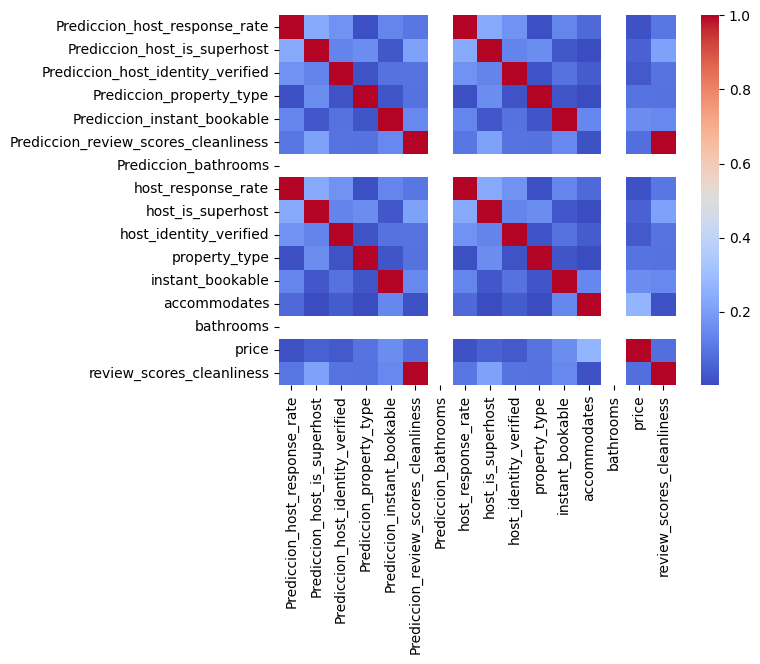

In [74]:
#mapa de calor de las coeficientes de correlación 
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'coolwarm')
Heart_Nap

<Axes: >

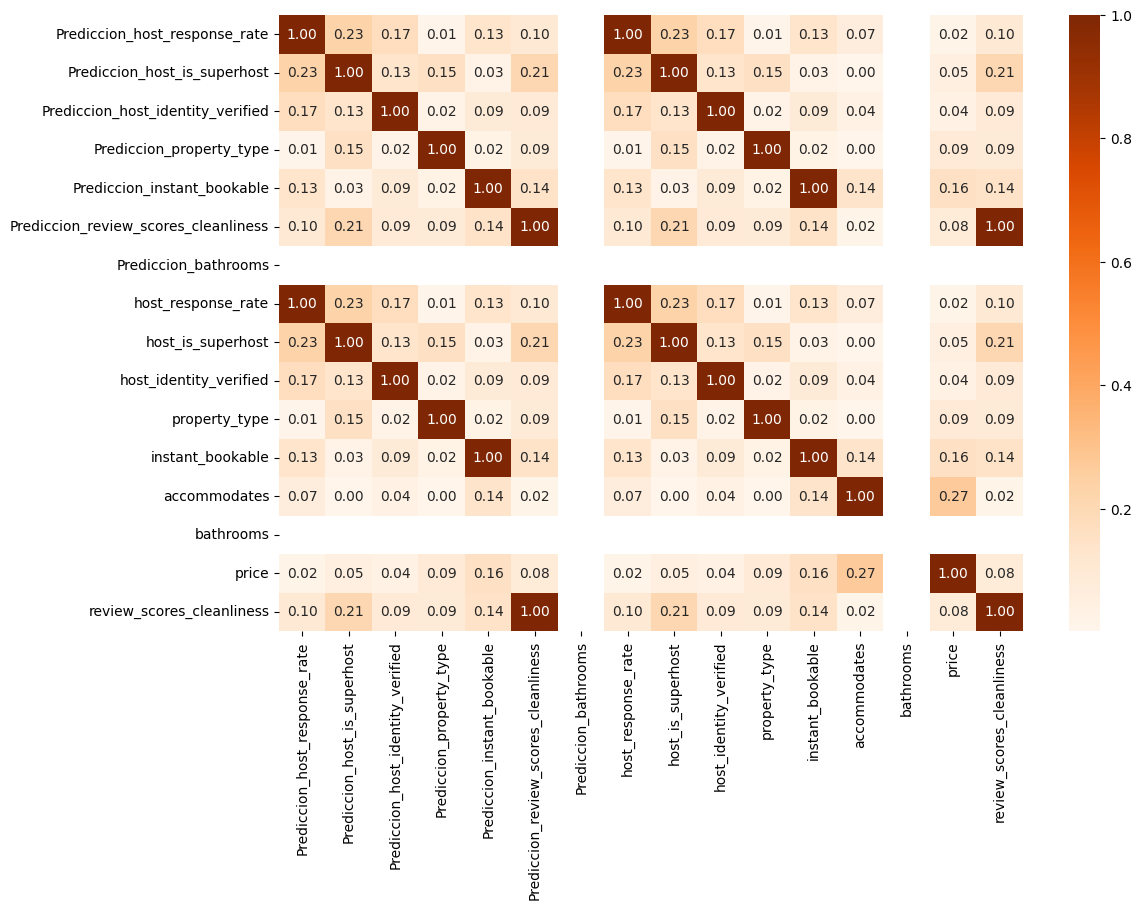

In [80]:
#Ajustamos el mapa de calor de las coeficientes de correlación 
plt.figure(figsize=(12,8))
Heart_Nap = sns.heatmap(Corr_Factors1, cmap= 'Oranges', annot=True, fmt=".2f")
Heart_Nap

In [76]:
# Obtener R² de cada modelo
r2_1 = model.score(Var_Indep, Var_Dep)
r2_2 = model2.score(Var_Indep2, Var_Dep)
r2_3 = model3.score(Var_Indep3, Var_Dep)
r2_4 = model4.score(Var_Indep4, Var_Dep)
r2_5 = model5.score(Var_Indep5, Var_Dep)
r2_6 = model6.score(Var_Indep6, Var_Dep)
r2_7 = model7.score(Var_Indep7, Var_Dep)
r2_8 = model8.score(Var_Indep8, Var_Dep2)

# Guardar los resultados en un diccionario
r2_values = {
    "host_response_rate": r2_1,
    "host_is_superhost": r2_2,
    "room_type": r2_3,
    "host_identity_verified": r2_4,
    "property_type": r2_5,
    "instant_bookable": r2_6,
    "review_scores_cleanliness": r2_7,
    "bathrooms": r2_8
}

# Ordenar y mostrar las 3 mejores variables
top_3 = sorted(r2_values.items(), key=lambda x: x[1], reverse=True)[:3]
print("Las 3 variables con mayor correlación son:")
for variable, r2 in top_3:
    print(f"{variable}: R² = {r2:.4f}")

Las 3 variables con mayor correlación son:
instant_bookable: R² = 0.0245
property_type: R² = 0.0085
review_scores_cleanliness: R² = 0.0069


In [ ]:
Corr_Factors1.to_csv('correlación entire.csv')